# Perkenalan
- - -
1. Latar belakang memilih kasus
2. Data yang digunakan (jumlah data, kelas, sumber)
3. *Objective* yang ingin dicapai
4. *Authors* dan *Creators*

###1. Latar belakang memilih kasus

Pemilihan kasus pada projek kali ini yakni tentang penyakit jantung. Penyakit jantung merupakan salah satu penyakit yang dapat menyebabkan kematian utama di dunia. Dan dengan adanya machine learning yang digunakan pada projek ini sehingga diharapkan dapat memprediksi penyakit jantung.

###2. Data yang digunakan

Data yang digunakan pada projek kali ini yakni data prediksi penyakit jantung yang dapat dilihat di link [Heart Failure Prediction](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data). Memiliki jumlah data sebanyak 298 dan memiliki 13 kelas.

###3. *Objective* yang ingin dicapai

*Objective* yang ingin dicapai pada analisis ini yaitu:
1. Mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi kematian oleh penyakit gagal jantung
2. Dapat memprediksi kematian berdasarkan faktor-faktor yang mempengaruhinya menggunakan metode ***ensemble***

###4. *Authors* dan *Creators*

1. Joesoef Septadi Wijaya
2. Ima Nur Firda Alma'ida
3. Intan Amelia

PYTN-KS013


Studi Independen - Kampus Merdeka

# *Import Libraries*

In [ ]:
# Data Loading
import pandas as pd
import numpy as np

# Splitting Dataset
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Model Performance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Other
import pickle

# *Data Loading*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Menampilkan isi data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DatasetH8/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


* Sex - Gender of patient Male = 1, Female =0
* Age - Age of patient
* Diabetes - 0 = No, 1 = Yes
* Anaemia - 0 = No, 1 = Yes
* High_blood_pressure - 0 = No, 1 = Yes
* Smoking - 0 = No, 1 = Yes
* DEATH_EVENT - 0 = No, 1 = Yes

### Mengetahui dimensi data

In [ ]:
attributes = df.columns.values
attributes

array(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'], dtype=object)

### Melihat informasi kolom, baris dan tipe data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Dari hasil ini terlihat bahwa tidak terdapat nilai *missing values* pada setiap atribut. Selain itu, ada beberapa tipe data yang beragam dari data yang diperoleh, seperti *object (category)* dan *float*

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Diabetes, Anemia, High_blood_pressure, smoking, DEATH_EVENT bukanlah data numerik numerik sehingga hasil di atas tidak valid untuk data data tersebut. Data-data tersebut merupakan data yang berjenis boolean yang mengindikasikan ya atau tidak. 

### Melihat banyaknya *missing values* dan duplikasi data untuk setiap atribut 

In [ ]:
# Melakukan pengecekan missing values
missingvalues = pd.DataFrame(df.isnull().sum(),columns = ['Number Of Null'])
missingvalues['Percentage'] = missingvalues['Number Of Null']/df.shape[0]*100
missingvalues

,Number Of Null,Percentage
age,0,0.0
anaemia,0,0.0
creatinine_phosphokinase,0,0.0
diabetes,0,0.0
ejection_fraction,0,0.0
high_blood_pressure,0,0.0
platelets,0,0.0
serum_creatinine,0,0.0
serum_sodium,0,0.0
sex,0,0.0


In [ ]:
# Melihat banyaknya unique values untuk tiap atribut
for col in df.columns:
  print(col,':',df[col].nunique())

age : 47
anaemia : 2
creatinine_phosphokinase : 208
diabetes : 2
ejection_fraction : 17
high_blood_pressure : 2
platelets : 176
serum_creatinine : 40
serum_sodium : 27
sex : 2
smoking : 2
time : 148
DEATH_EVENT : 2


# Data Cleaning

### Melakukan pengecekan duplikasi pada data

In [ ]:
# Melakukan pengecekan duplikasi data
df.duplicated().sum()

0

### Me-*rename* nama kolom

In [ ]:
# Rename kolom dari dataset
def rename_columns_df(df):
  df1 = df.rename(
      columns = {
          'age':'Usia', 
          'anaemia':'Anaemia',
          'creatinine_phosphokinase':'Kreatinin_fosfokinase', 
          'diabetes':'Diabetes',
          'ejection_fraction':'Fraksi_ejeksi', 
          'high_blood_pressure':'Tekanan_darah_tinggi',
          'platelets':'Platelets', 
          'serum_creatinine':'Kreatinin_serum', 
          'serum_sodium':'Sodium_serum',
          'sex':'Gender',
          'smoking':'Perokok',
          'time':'Waktu', 
          'DEATH_EVENT':'Kematian'
      },
  )
  return df1

# Memilih atribut numerikal dan kategorikal --> ini kayaknya ga usah dimasukin, karena sebenernya ada boolean yang 0,1. kayaknya itu ga termasuk numerik
def attributes_type(df, include_numerical = ['float64','int64'], include_categorical = ['object']):
    numerical_columns = df.select_dtypes(include = include_numerical).columns.values
    categorical_columns = df.select_dtypes(include = include_categorical).columns.values
    return numerical_columns, categorical_columns

In [ ]:
df1 = rename_columns_df(df)

# Kelompokkan atribut berdasarkan tipe data
numerical_columns, categorical_columns = attributes_type(df)

In [ ]:
# Menampilkan 5 data teratas setelah nama kolom diubah
df1.head(5)

,Usia,Anaemia,Kreatinin_fosfokinase,Diabetes,Fraksi_ejeksi,Tekanan_darah_tinggi,Platelets,Kreatinin_serum,Sodium_serum,Gender,Perokok,Waktu,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**ANALISIS**

Dikarenakan tidak terdapat *missing values* maupun duplikasi pada data maka tidak diperlukan pengisian *missing values* 

### Melihat banyaknya nilai dari masing-masing atribut

In [ ]:
for col in df1.columns:
    print(col,': ')
    print(df1[col].value_counts())
    print("  ")
    print("  ")

Usia : 
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: Usia, dtype: int64
  
  
Anaemia : 
0    170
1    129
Name: Anaemia, dtype: int64
  
  
Kreatinin_fosfokinase : 
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: Kreatinin_fosfokinase, Length: 208, dtype: int64
  
  
Diabetes : 
0    174
1    125
Name: Diabetes, dtype: int64
  
  
Fraksi_ejeksi :

## Menghapus kolom yang tidak diperlukan


### Menghapus atribut ['Waktu'] karena tidak relevan dengan variabel target
- - -
Waktu menunjukkan waktu observasi pada pasien, sehingga atribut tersebut dianggap tidak cocok sebagai variabel independen, melainkan lebih cocok menjadi variabel target (untuk kasus yang lain). Variabel waktu lebih cocok digunakan untuk analisis survival yang nanti perhitungannya akan menggunakan metode Kaplan-Meier dan lain-lain.

In [ ]:
df1.drop(columns = ['Waktu'], inplace = True)

In [ ]:
# Menampilkan data teratas setelah di drop
df1.head(5)

,Usia,Anaemia,Kreatinin_fosfokinase,Diabetes,Fraksi_ejeksi,Tekanan_darah_tinggi,Platelets,Kreatinin_serum,Sodium_serum,Gender,Perokok,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


# Eksplorasi Data

## Melakukan Data *Query*, *Grouping*, dan Visualisasi

### Melihat *statistik descriptif* pada data numerik

In [ ]:
numeric = df1.drop(columns = ['Anaemia', 'Diabetes', 'Tekanan_darah_tinggi', 'Gender', 'Perokok', 'Kematian'])
numeric.describe()

,Usia,Kreatinin_fosfokinase,Fraksi_ejeksi,Platelets,Kreatinin_serum,Sodium_serum
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000


Diperoleh bahwa:
1. **Usia** rata-rata pasien yakni berkisar **60 tahun**
2. Rata-rata nilai **kreatinin fosfokinase** pada pasien yaitu **581,84**
3. **Fraksi ejeksi** maksimal yang ada pada pasien yaitu **80**
4. **Kreatinin serum minimal** yang ada pada pasien yaitu **0,5**
5. **Sodium serum** rata-rata pada pasien yaitu **136,63**


### Melihat *statistik descriptif* pada data kategorik

In [ ]:
categoric = df1.drop(columns = ['Usia', 'Kreatinin_fosfokinase', 'Fraksi_ejeksi', 'Platelets', 'Kreatinin_serum', 'Sodium_serum']).astype('category')
categoric.describe()

,Anaemia,Diabetes,Tekanan_darah_tinggi,Gender,Perokok,Kematian
count,299,299,299,299,299,299
unique,2,2,2,2,2,2
top,0,0,0,1,0,0
freq,170,174,194,194,203,203


Diperoleh bahwa:
1. Pasien yang **tidak mengidap anemia** yaitu **170** pasien
2. Pasien yang **tidak mengidap diabetes** yaitu **174** pasien
3. Pasien dengan **tidak mengidap tekanan darah tinggi** yaitu **194** pasien
4. Pasien yang **tidak merokok** yakni **203** pasien
5. Pasien yang **tidak meninggal** berjumlah **203** orang

In [ ]:
# Menyiapkan List Warna untuk kebutuhan visualisasi grafik
colors_list = ['hotpink', 'lightslategray', 'cornflowerblue', 'darkseagreen', 'salmon', 'burlywood', 'lightskyblue', 'khaki']

### Melakukan *grouping* pada atribut **Usia** dan **Kematian** untuk melihat nilai rata-ratanya

In [ ]:
mean1 = df1[['Usia','Kematian']].groupby('Kematian').mean().sort_values(by = 'Usia', ascending = True)
mean1

,Usia
Kematian,
0,58.761906
1,65.215281


Dari hasil di atas diperoleh bahwa rata-rata usia **pasien yang meninggal** yakni pada usia **65 tahun**, sedangkan rata-rata **pasien yang bertahan/tidak meninggal** pada usia **58 tahun**


### Melakukan *crosstab* pada atribut **Perokok** dan **Kematian** untuk melihat proporsi dataset

In [ ]:
pd.crosstab(df1.Perokok, df1.Kematian)

Kematian,0,1
Perokok,,
0,137,66
1,66,30


Diperoleh bahwa banyaknya **kasus kematian pasien yang merokok** yakni sebesar **30 pasien**, sedangkan proporsi pasien yang merokok **dapat bertahan dan tidak merokok namun meninggal** adalah sama yakni **66 pasien**. Untuk pasien yang tidak merokok dan tidak meninggal memiliki jumlah yang paling besar yakni **137 pasien**

### Melakukan *crosstab* atribut ***smoking*** dan ***DEATH EVENT***

([<matplotlib.axis.XTick at 0x7f1ecb3bbd00>,
 [Text(0, 0, 'Tidak Merokok'), Text(1, 0, 'Merokok')])

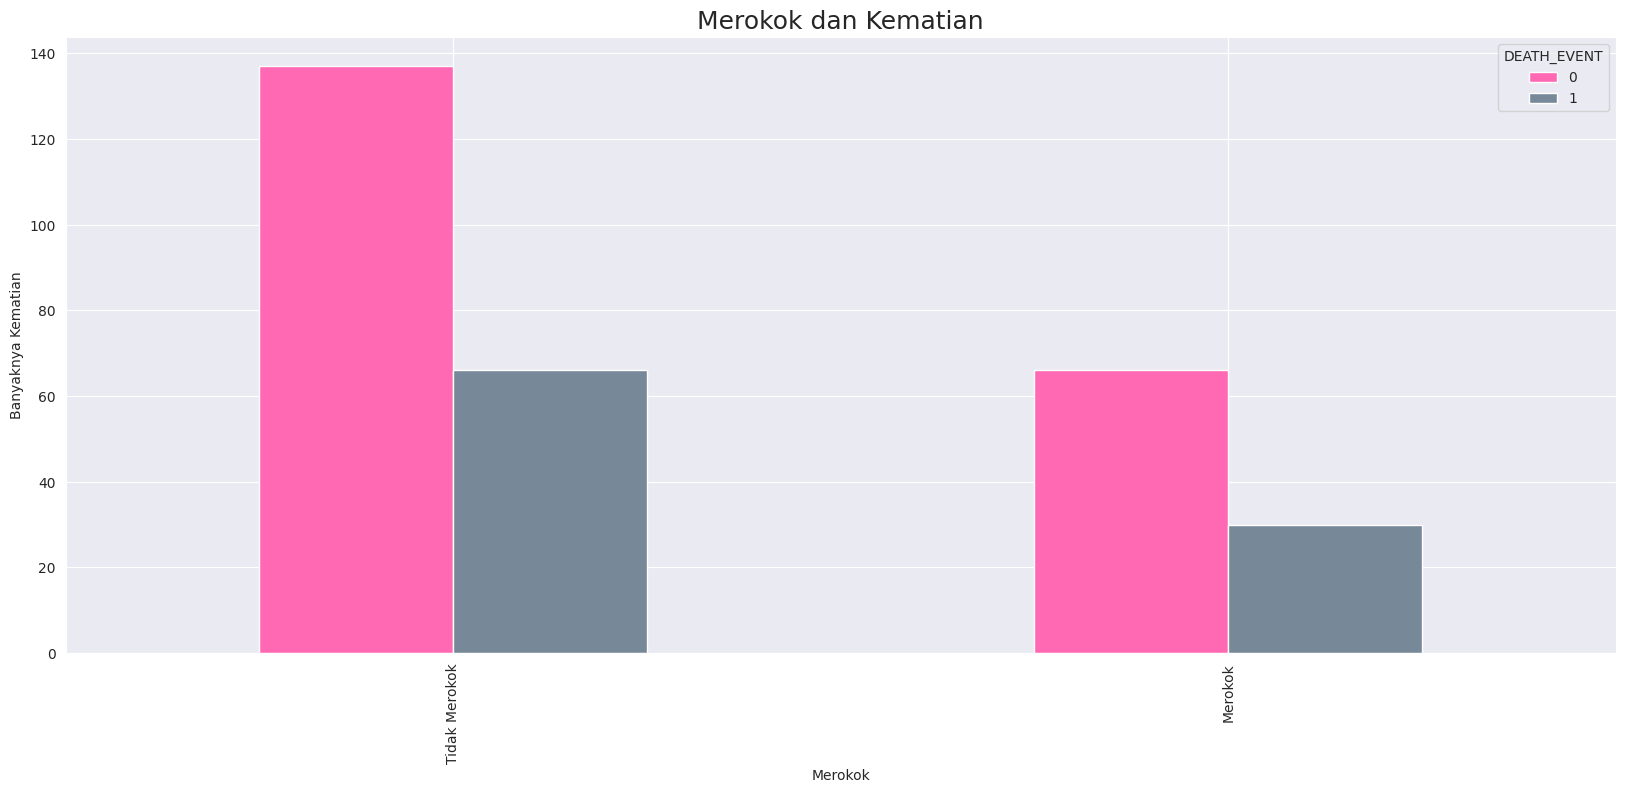

In [ ]:
pd.crosstab(df.smoking, df.DEATH_EVENT).plot(kind = 'bar', color = colors_list)
plt.title('Merokok dan Kematian', size = 18)
plt.ylabel('Banyaknya Kematian')
plt.xlabel('Merokok')
plt.xticks(ticks= (0,1), labels = ['Tidak Merokok','Merokok'])

**ANALISIS**


Diperoleh hasil bahwa jumlah pasien meninggal yang disebabkan merokok lebih sedikit dibandingkan dengan jumlah pasien yang meninggal disebabkan yang lain

### *Boxplot* untuk melihat distribusi data, *outlier data*

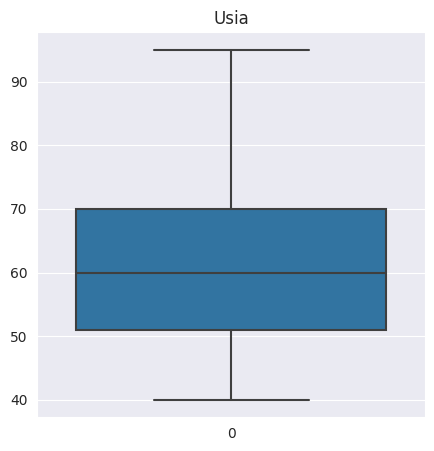

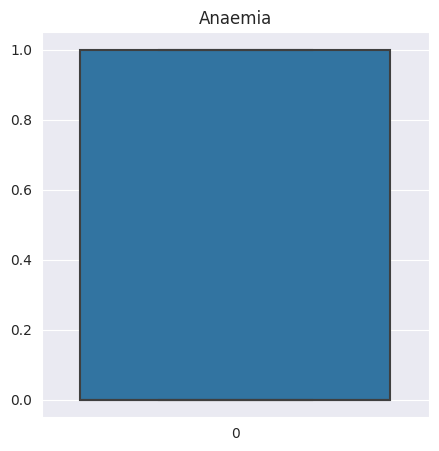

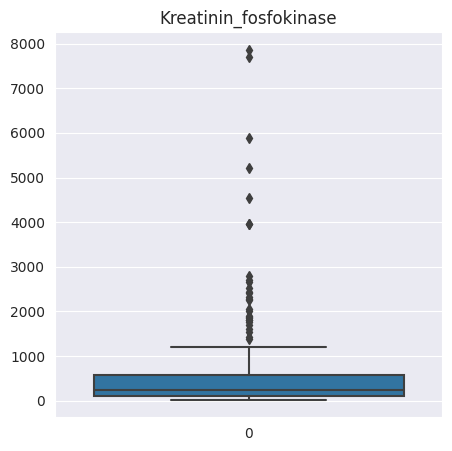

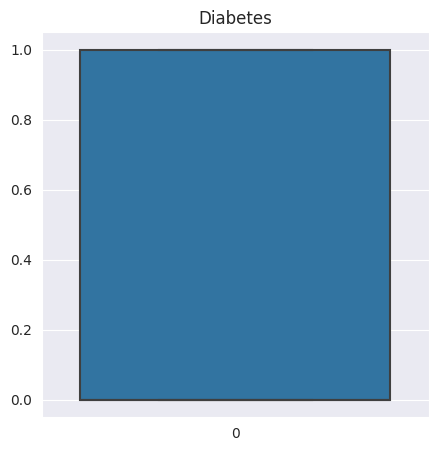

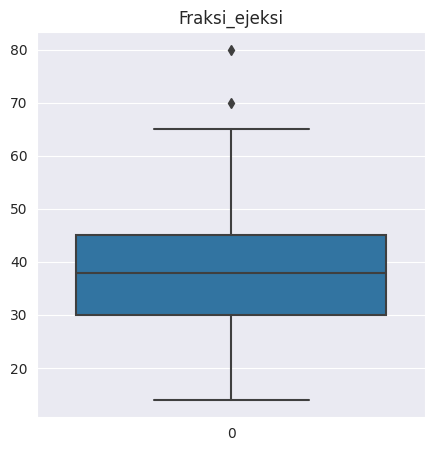

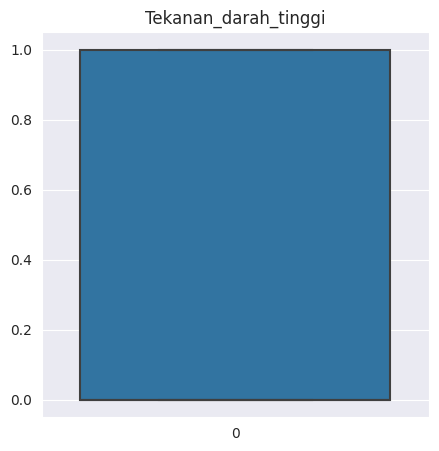

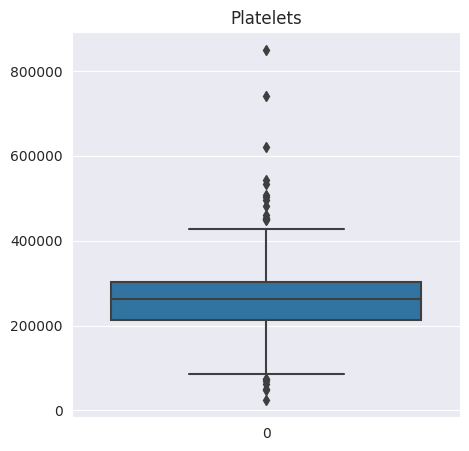

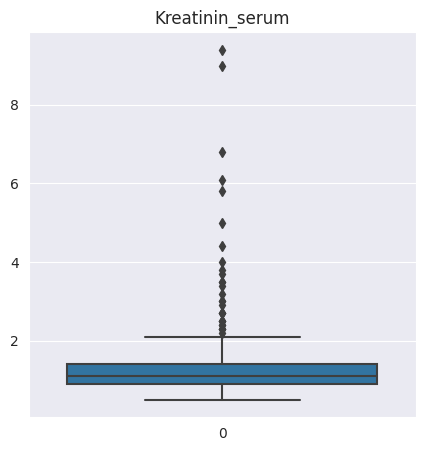

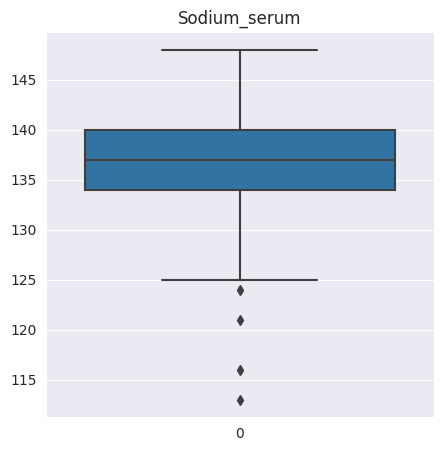

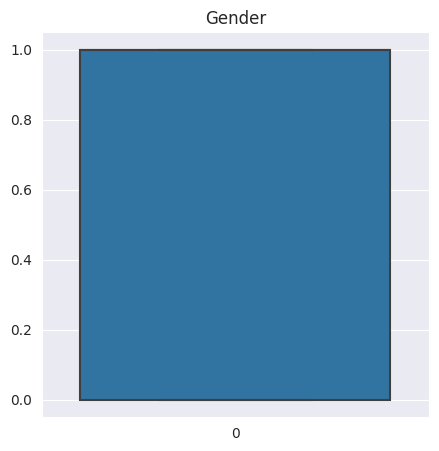

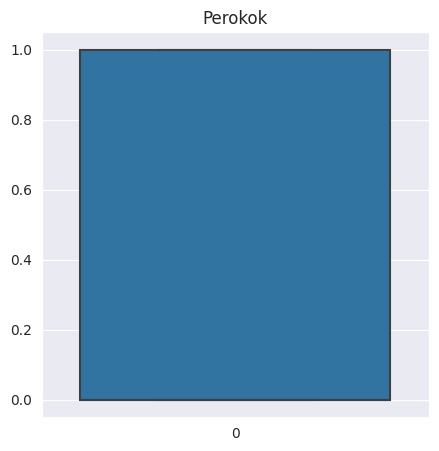

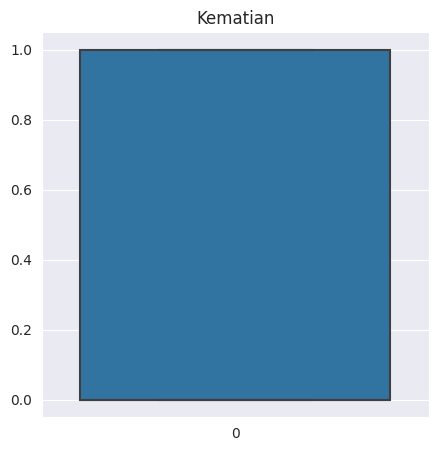

In [ ]:
for feature in df1:
    plt.figure(figsize = (5,5))
    sns.boxplot(df1[feature])
    plt.title(feature)

**ANALISIS**
Selanjutnya melakukan visualisasi histogram untuk melihat proporsi data.

### Histogram untuk melihat proporsi data

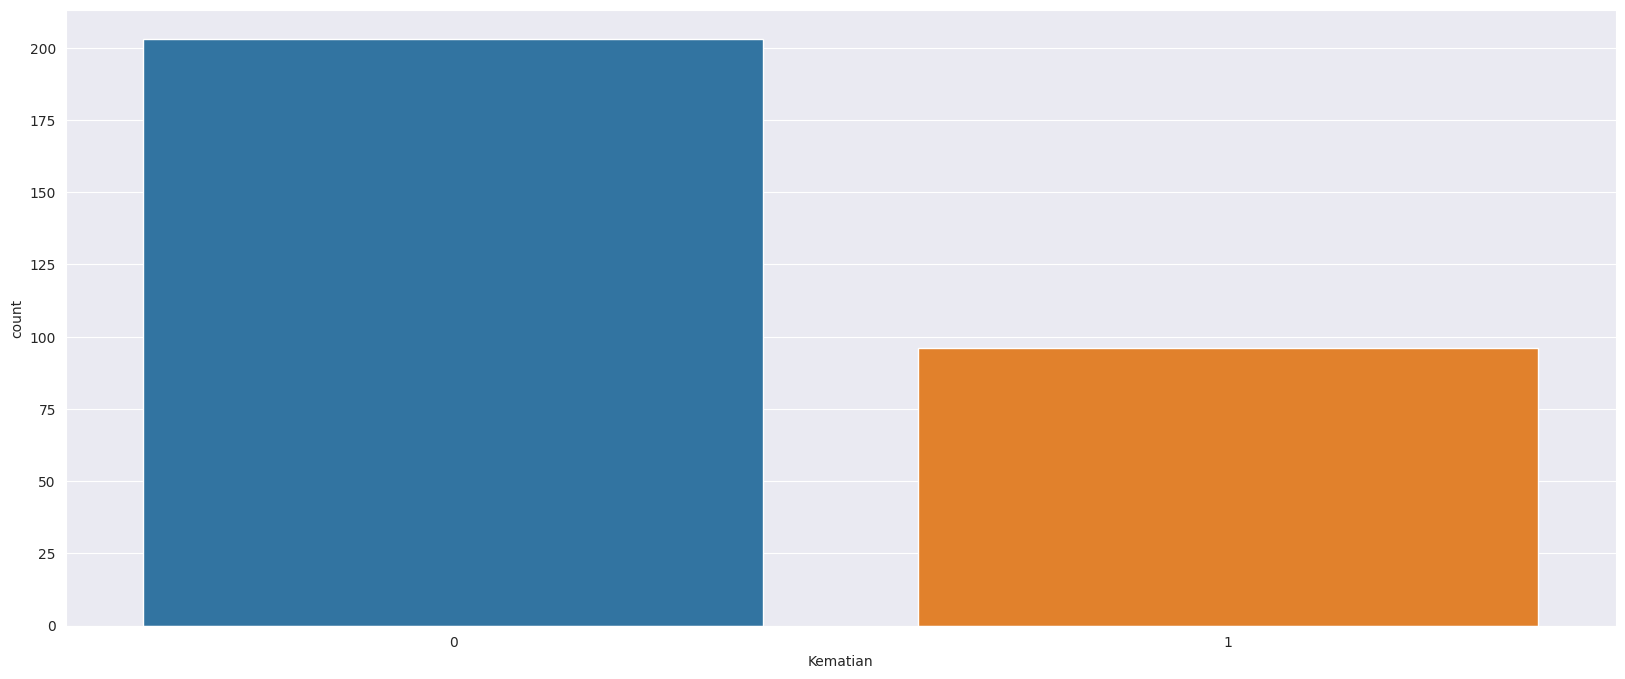

In [ ]:
sns.countplot(x = "Kematian", data = df1)
plt.show()

**ANALISIS** 
Diperoleh bahwa proporsi data antara pasien yang meninggal maupun yang tidak adalah tidak berbeda signifikan

### *Correlation Matrix* antar variabel untuk melihat hubungan

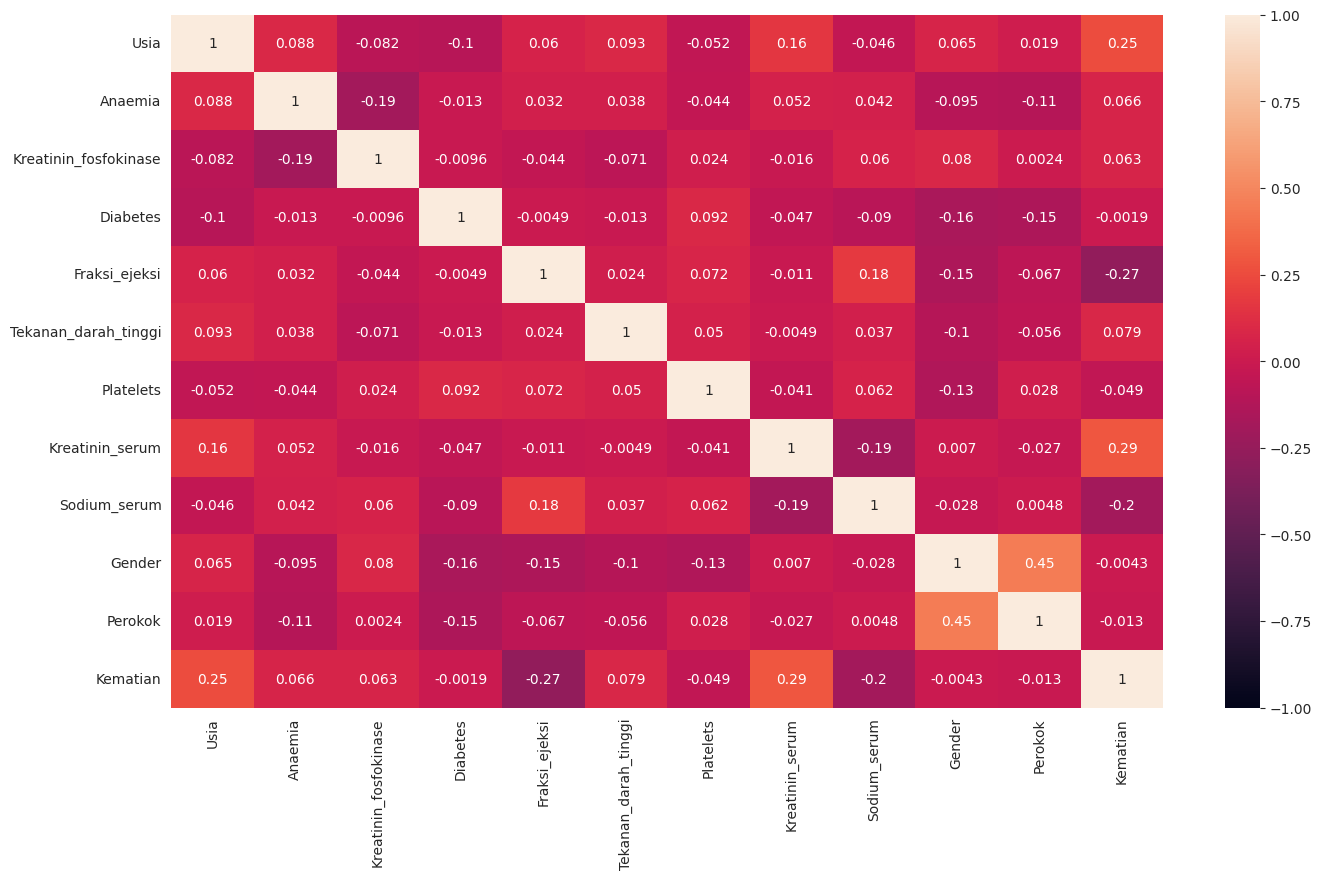

In [ ]:
plt.figure(figsize = (16, 9))
sns.heatmap(df1.corr(), vmin = -1, vmax = 1, annot = True)
plt.show()

In [ ]:
df1.corr()['Kematian'].sort_values(ascending = False)

Kematian                 1.000000
Kreatinin_serum          0.294278
Usia                     0.253729
Tekanan_darah_tinggi     0.079351
Anaemia                  0.066270
Kreatinin_fosfokinase    0.062728
Diabetes                -0.001943
Gender                  -0.004316
Perokok                 -0.012623
Platelets               -0.049139
Sodium_serum            -0.195204
Fraksi_ejeksi           -0.268603
Name: Kematian, dtype: float64

**ANALISIS** 
Diperoleh :
1. Atribut yang memiliki korelasi tertinggi 4 teratas yaitu atribut **kreatinin serum, usia, fraksi ejeksi,** dan **sodium serum**
2. Pada atribut fraksi ejeksi dan sodium serum memiliki korelasi negatif dengan *Kematian*
3. Untuk atribut kreatinin serum dan usia memiliki korelasi positif dengan *Kematian* 


# Data Preprocessing

### Melakukan inisiasi variabel X dan Y

In [ ]:
X = df1[['Fraksi_ejeksi','Kreatinin_serum','Sodium_serum']]
y = df1['Kematian']
print(X.shape)
print(y.shape)

(299, 3)
(299,)


### *Feature Selection*

Melakukan *feature selection* menggunakan *library *SequentialFeatureSelector** dengan Metode Rergesi Linier, banyak atribut 10, metode *forward*, evaluasi dengan *R squared*, dan cv dengan k=3

In [ ]:
et = ExtraTreesClassifier()
et.fit(X, y)

ExtraTreesClassifier()

In [ ]:
et.feature_importances_

array([0.32807986, 0.41058995, 0.26133019])

Selain itu juga melakukan *feature selection* menggunakan *library F regression* dengan k=10 

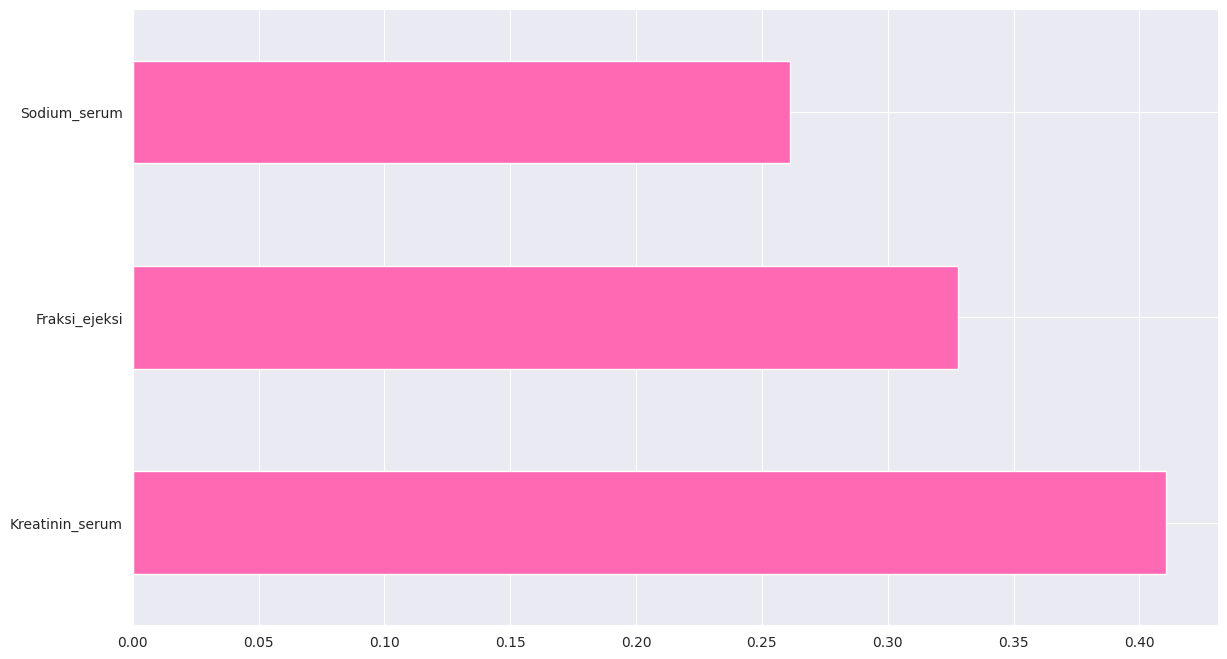

In [ ]:
plt.figure(figsize = (14,8))
feat_importances = pd.Series(et.feature_importances_, index = X.columns)
feat_importances.nlargest(12).plot(kind = 'barh', color = "hotpink")
plt.show()

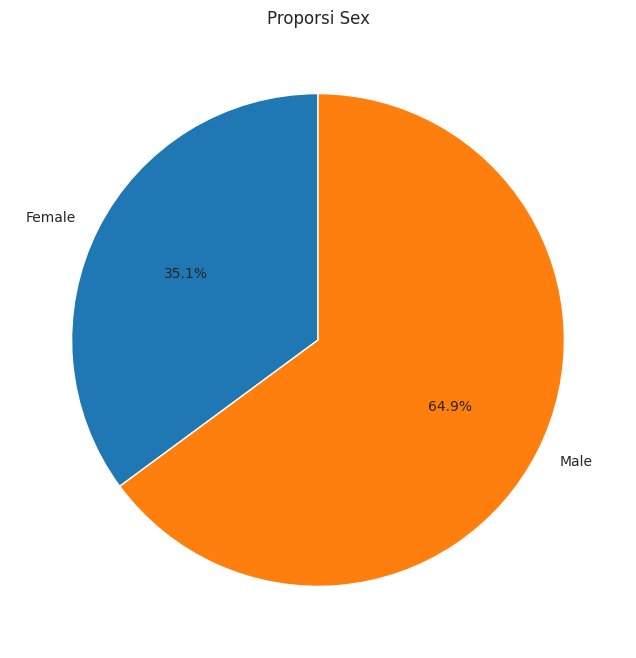

In [ ]:
label = ['Female','Male']
female = df[df['sex'] == 0]
male = df[df['sex'] == 1]
value = [len(female), len(male)]
plt.pie(value, labels = label, autopct = '%1.1f%%', startangle = 90)
plt.title('Proporsi Sex')
plt.show()

Jumlah laki-laki lebih banyak dibandingkan dengan jumlah perempuan pada dataset ini.

<ipython-input-700-6af522e11c0f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_survi = male[df["DEATH_EVENT"]==0]
<ipython-input-700-6af522e11c0f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_not = male[df["DEATH_EVENT"]==1]
<ipython-input-700-6af522e11c0f>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_survi = female[df["DEATH_EVENT"]==0]
<ipython-input-700-6af522e11c0f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_not = female[df["DEATH_EVENT"]==1]
<ipython-input-700-6af522e11c0f>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = [len(male[df["DEATH_EVENT"]==0]),len(male[df["DEATH_EVENT"]==1]),
<ipython-input-700-6af522e11c0f>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(female[df["DEATH_EVENT"]==0]),len(female[df["DEATH_EVENT"]==1])]


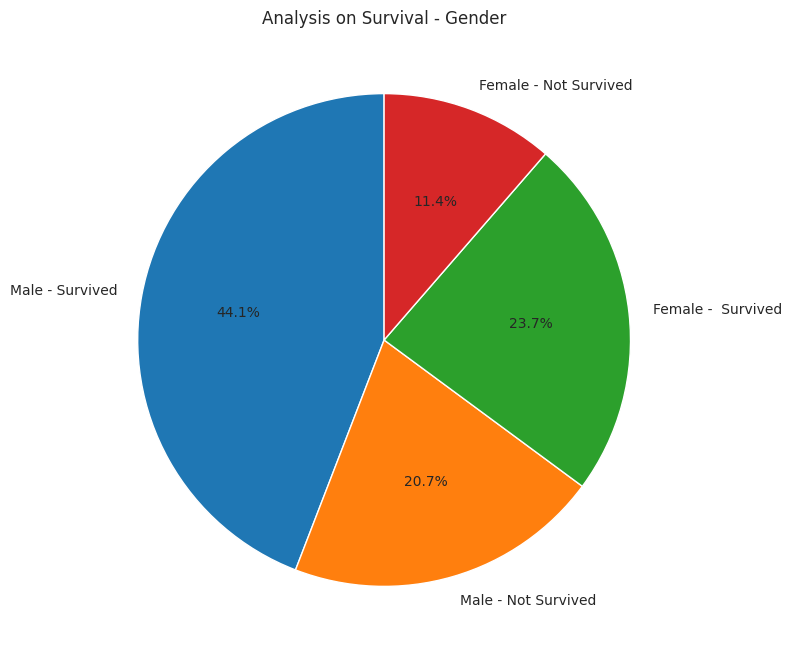

In [ ]:
male = df[df["sex"]==1]
female = df[df["sex"]==0]

male_survi = male[df["DEATH_EVENT"]==0]
male_not = male[df["DEATH_EVENT"]==1]
female_survi = female[df["DEATH_EVENT"]==0]
female_not = female[df["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[df["DEATH_EVENT"]==0]),len(male[df["DEATH_EVENT"]==1]),
         len(female[df["DEATH_EVENT"]==0]),len(female[df["DEATH_EVENT"]==1])]
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Analysis on Survival - Gender')
plt.show()

Jumlah pasian laki-laki yang survived dan tidak survived lebih banyak dibandingkan dengan perempuan. Hal ini wajar sekali terjadi karena memang presentase jumlah laki-laki lebih banyak jika dibandingkan dengan jumlah perempuan. Presentase laki-laki yang meninggal juga lebih sedikit jika dibandingkan dengan yang survived. Hal ini juga terjadi pada pasien wanita. 

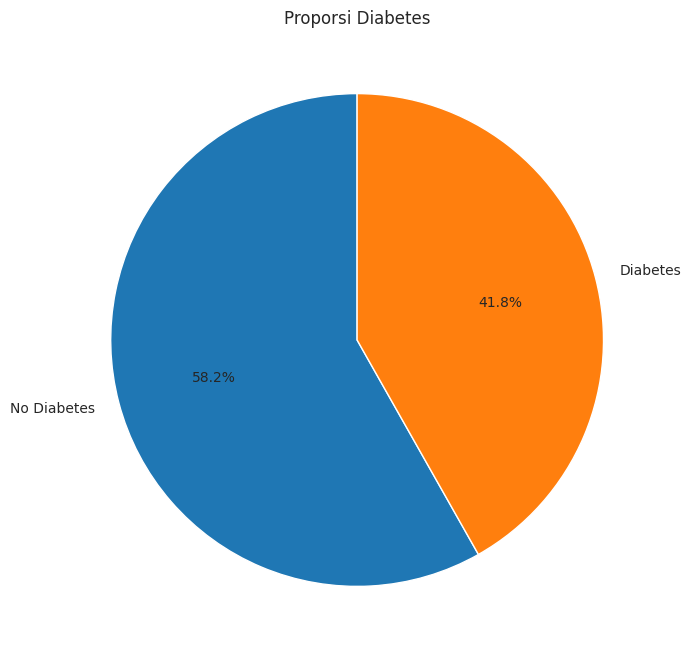

In [ ]:
labels2 = ['No Diabetes','Diabetes']
diabetes_yes = df[df['diabetes']==1]
diabetes_no = df[df['diabetes']==0]
values2 = [len(diabetes_no), len(diabetes_yes)]
plt.pie(values2, labels=labels2, autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Diabetes')
plt.show()


Pasien yang tidak memiliki diabetes lebih banyak jika dibandingkan dengan yang tidak memiliki diabetes

<ipython-input-702-b3933c86e65e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diabetes_yes_survi = diabetes_yes[df["DEATH_EVENT"]==0]
<ipython-input-702-b3933c86e65e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diabetes_yes_not_survi = diabetes_yes[df["DEATH_EVENT"]==1]
<ipython-input-702-b3933c86e65e>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diabetes_no_survi = diabetes_no[df["DEATH_EVENT"]==0]
<ipython-input-702-b3933c86e65e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diabetes__no_not_survi = diabetes_no[df["DEATH_EVENT"]==1]
<ipython-input-702-b3933c86e65e>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = [len(diabetes_yes[df["DEATH_EVENT"]==0]),len(diabetes_yes[df["DEATH_EVENT"]==1]),
<ipython-input-702-b3933c86e65e>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index

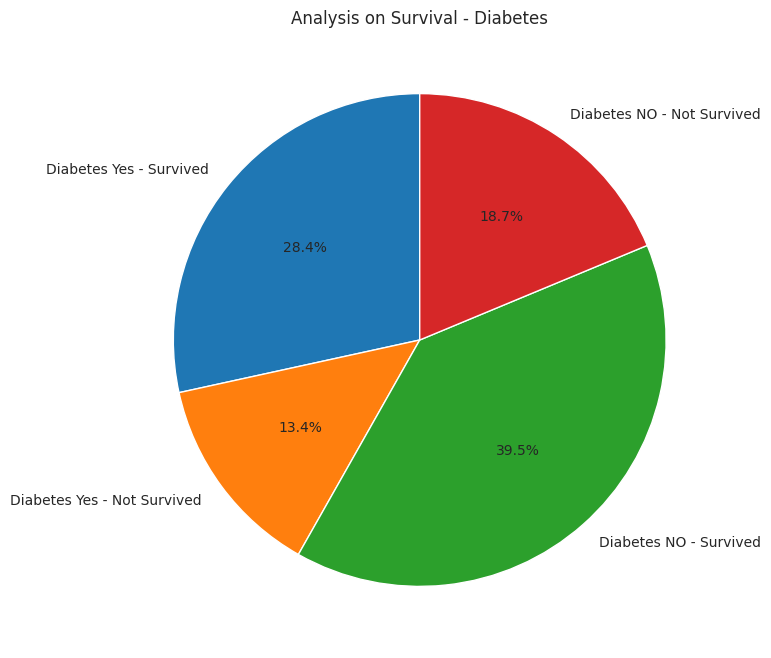

In [ ]:
diabetes_yes_survi = diabetes_yes[df["DEATH_EVENT"]==0]
diabetes_yes_not_survi = diabetes_yes[df["DEATH_EVENT"]==1]
diabetes_no_survi = diabetes_no[df["DEATH_EVENT"]==0]
diabetes__no_not_survi = diabetes_no[df["DEATH_EVENT"]==1]

labels = ['Diabetes Yes - Survived','Diabetes Yes - Not Survived', 'Diabetes NO - Survived', 'Diabetes NO - Not Survived']
values = [len(diabetes_yes[df["DEATH_EVENT"]==0]),len(diabetes_yes[df["DEATH_EVENT"]==1]),
         len(diabetes_no[df["DEATH_EVENT"]==0]),len(diabetes_no[df["DEATH_EVENT"]==1])]
plt.pie(values, labels = labels, autopct='%1.1f%%', startangle=90)
plt.title('Analysis on Survival - Diabetes')
plt.show()

Pasien yang tidak memiliki diabetes

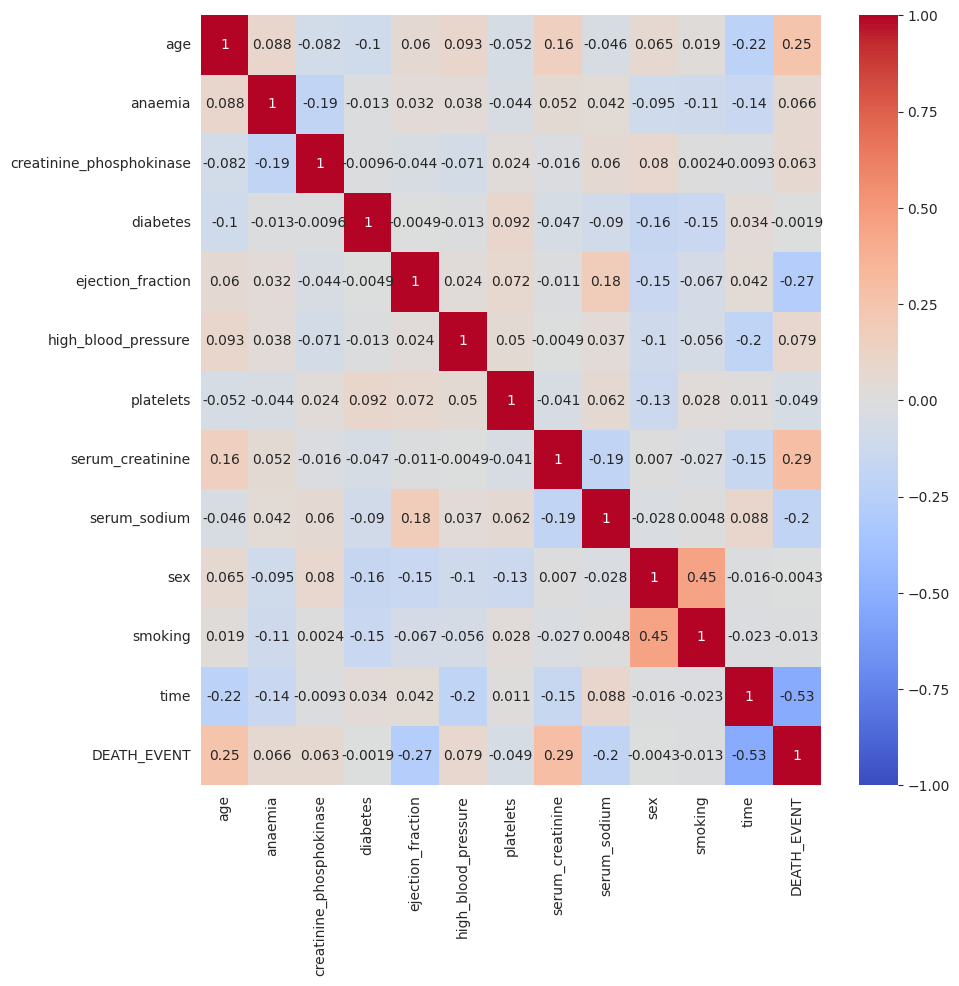

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
accuracy_list = []
precision_list = []
recall_list = []

In [ ]:
rf_class = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
rf_class.fit(X_train, y_train)
r_pred = rf_class.predict(X_test)
r_acc = accuracy_score(y_test, r_pred)
precision = precision_score(y_test, r_pred)
recall = recall_score(y_test, r_pred)
accuracy_list.append(100*r_acc)
precision_list.append(precision)
recall_list.append(recall)

In [ ]:
print("Accuracy of Random Forest Classifier is : ", "{:.5f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  77.77778%


In [ ]:
gradient_boosting = GradientBoostingClassifier(max_depth=2, random_state=1)
gradient_boosting.fit(X_train, y_train)
r_pred = gradient_boosting.predict(X_test)
r_acc = accuracy_score(y_test, r_pred)
precision = precision_score(y_test, r_pred)
recall = recall_score(y_test, r_pred)
accuracy_list.append(100*r_acc)
precision_list.append(precision)
recall_list.append(recall)

In [ ]:
print("Accuracy of Gradient Boosting Classifier is : ", "{:.5f}%".format(100* r_acc))

Accuracy of Gradient Boosting Classifier is :  74.44444%


In [ ]:
classifier = XGBClassifier(n_estimators = 10, max_depth=12, subsample=0.7)
classifier.fit(X_train,y_train)
r_pred = gradient_boosting.predict(X_test)
r_acc = accuracy_score(y_test, r_pred)
precision = precision_score(y_test, r_pred)
recall = recall_score(y_test, r_pred)
accuracy_list.append(100*r_acc)
precision_list.append(precision)
recall_list.append(recall)

In [ ]:
print("Accuracy of XGBoost Classifier is : ", "{:.5f}%".format(100* r_acc))

Accuracy of XGBoost Classifier is :  74.44444%


In [ ]:
model_list = ['Random Forest', 'Gradient_Boosting', 'XGboost']

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80'),
  Text(0, 90.0, '90')])

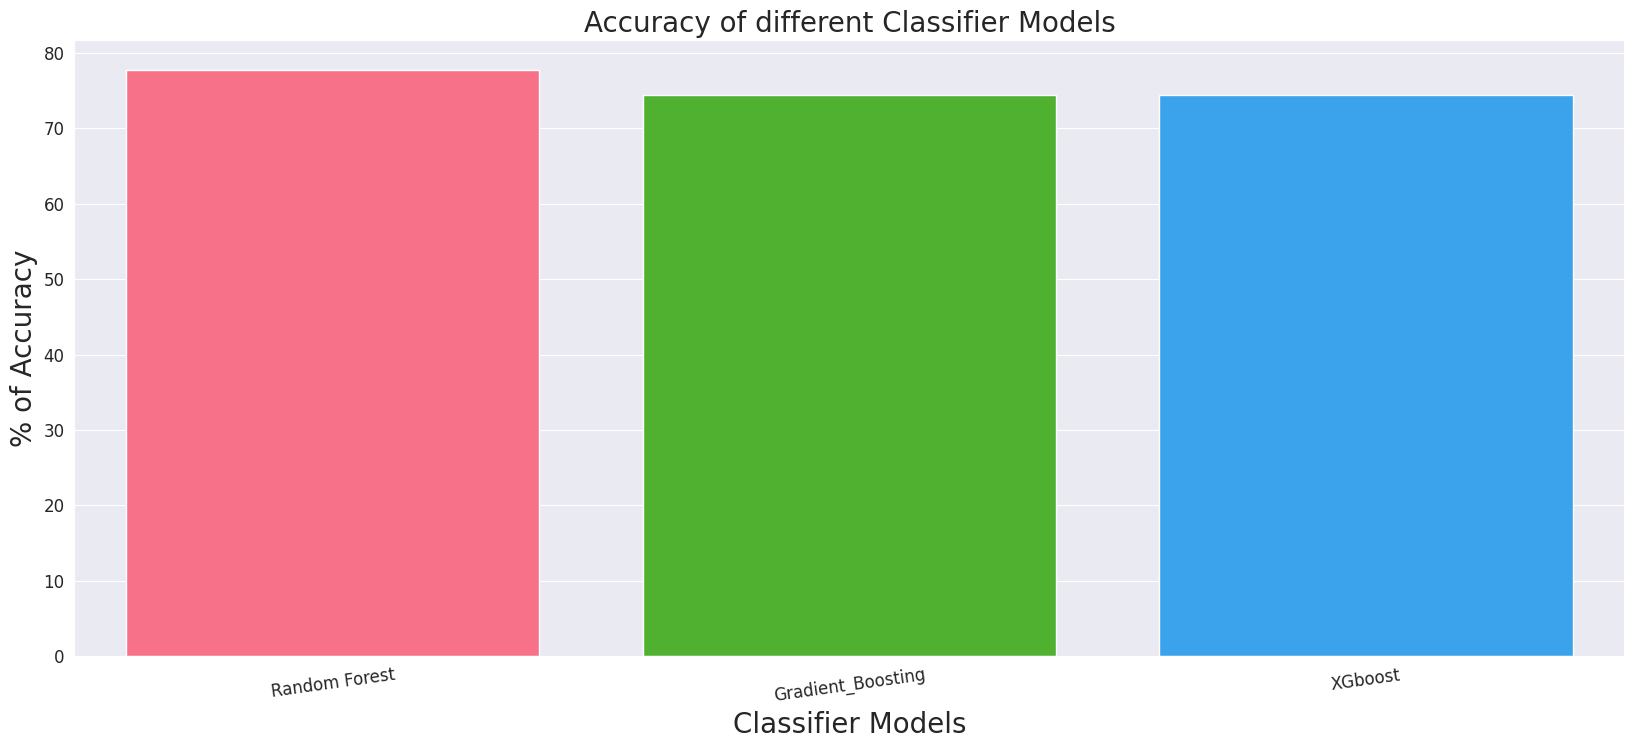

In [ ]:
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7')])

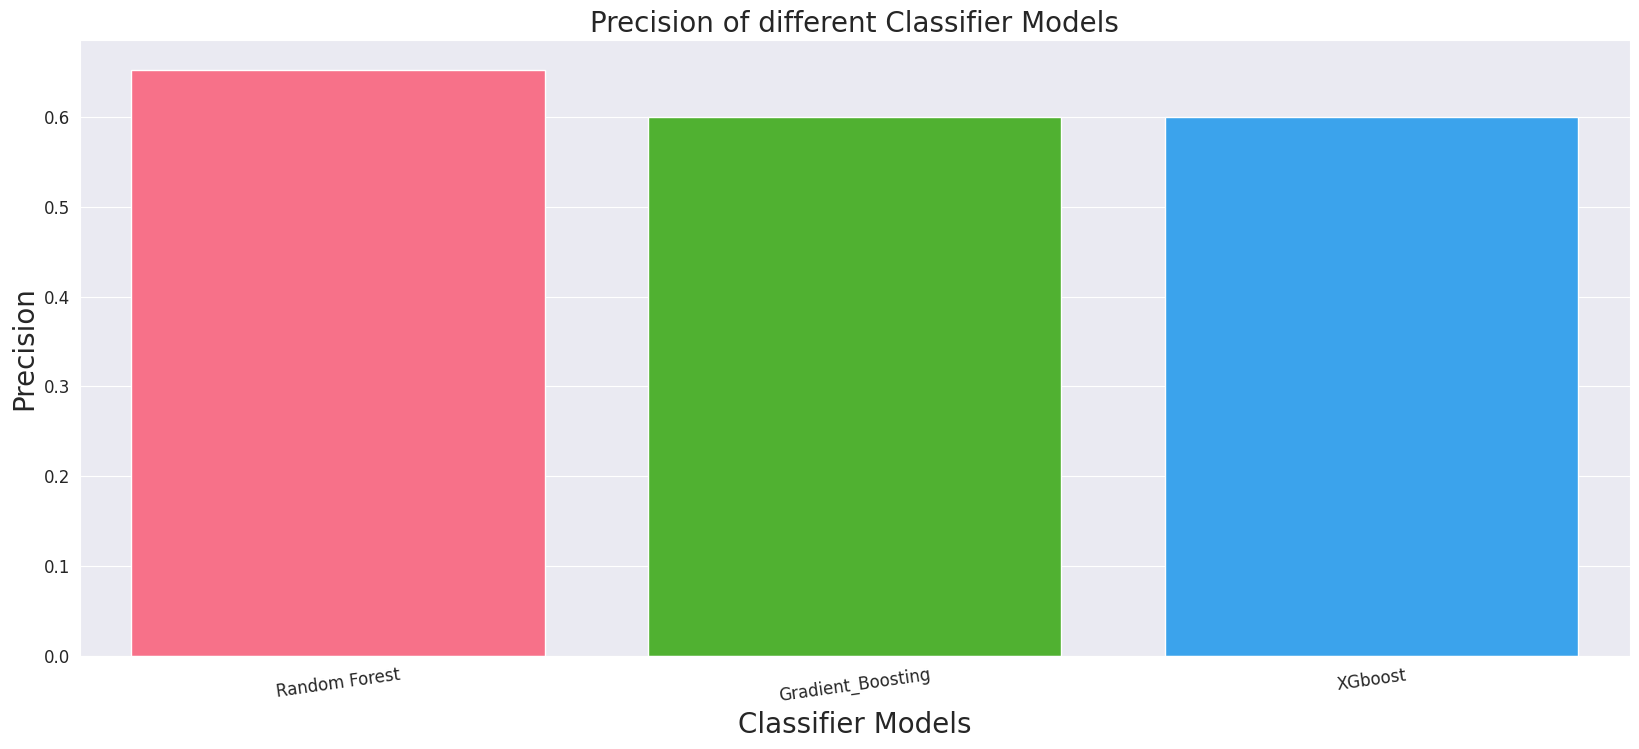

In [ ]:
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=precision_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('Precision', fontsize = 20)
plt.title('Precision of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6')])

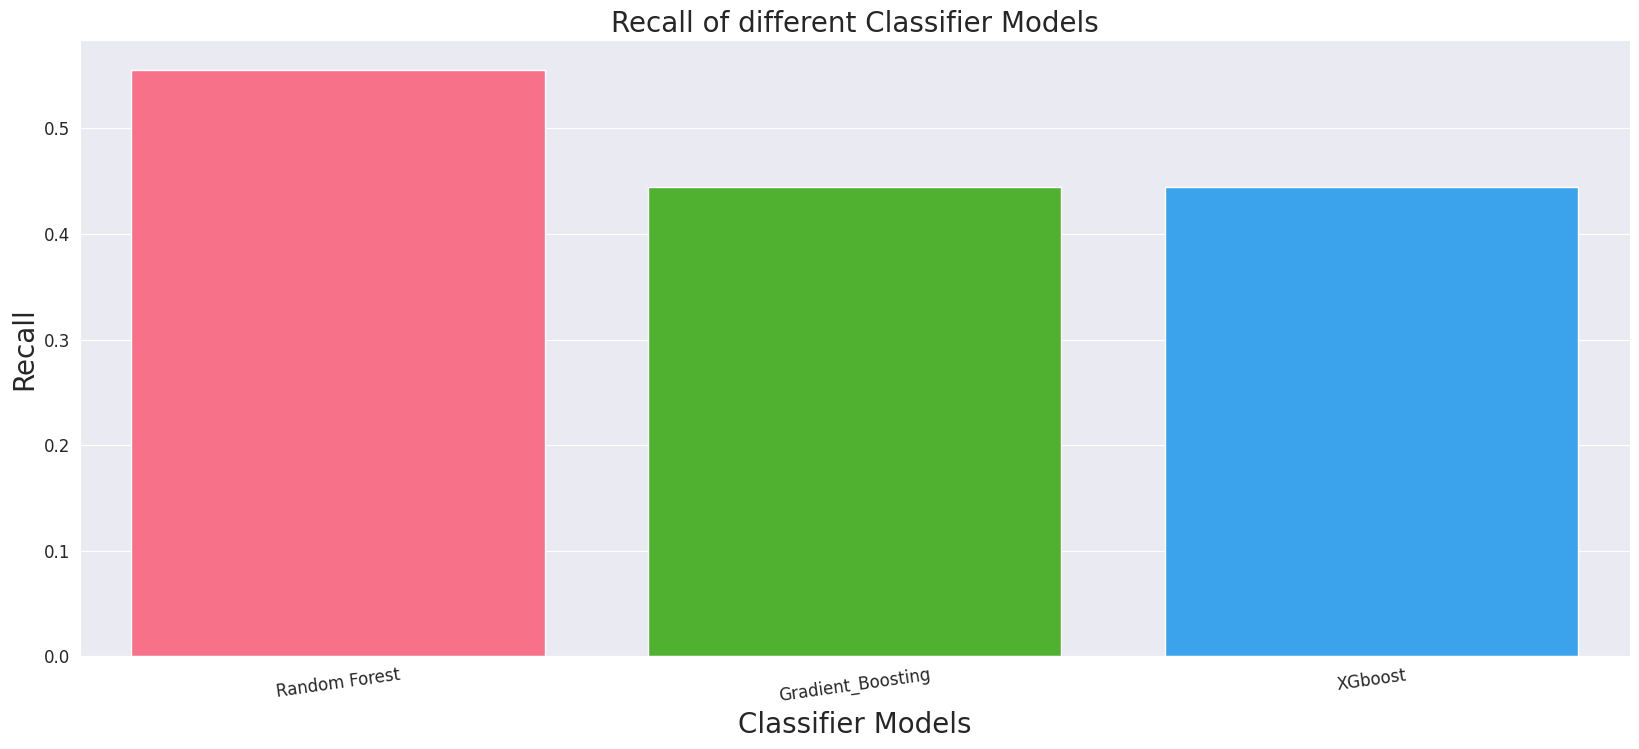

In [ ]:
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=recall_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('Recall', fontsize = 20)
plt.title('Recall of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)

# Model Inference

In [ ]:
X_to_test = X.copy()

In [ ]:
to_inference = X_to_test[16:20]
to_inference

,Fraksi_ejeksi,Kreatinin_serum,Sodium_serum
16,38,0.9,140
17,14,0.8,127
18,25,1.0,140
19,55,1.9,121


In [ ]:
X_to_test = pd.concat([X_to_test, pd.DataFrame(to_inference)], ignore_index = True)

In [ ]:
X_to_test = X_to_test[-2:]
X_to_test

,Fraksi_ejeksi,Kreatinin_serum,Sodium_serum
301,25,1.0,140
302,55,1.9,121


In [ ]:
kematian_rf = rf_class.predict(X_to_test)

In [ ]:
kematian_rf

array([1, 1])

In [ ]:
kematian_gradient_boosting = gradient_boosting.predict(X_to_test)

In [ ]:
kematian_gradient_boosting

array([1, 1])

#Kesimpulan

*   Didapatkan bahwa model terbaik adalah model Random Forest dengan Akurasi sekitar 77,7778%.
*   Jika menggunakan variabel waktu, model yang digunakan harus dirubah dengan menggunakan model yang dapat mengakomodir analisis survival.

